# Mono resistance EDA

In this POC, we gloss over the resistance towards distinct drugs


In [1]:
# Import the usual suspects.

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
sns.set_context('paper')



def print_ln():
    print('-' * 80, '\n')


## Data from tb-profiler

In [2]:
tbprofiler_df = pd.read_json("../data/raw/cohort.tbprofiler.json", encoding="UTF-8")
tbprofiler_df = tbprofiler_df.transpose()
tbprofiler_df.head()


,rifampicin,isoniazid,pyrazinamide,ethambutol,streptomycin,fluoroquinolones,moxifloxacin,ofloxacin,levofloxacin,ciprofloxacin,...,cycloserine,linezolid,bedaquiline,clofazimine,delamanid,main_lin,sublin,drtype,MDR,XDR
SRR1162996,rpoB_p.His445Asp,"katG_p.Ser315Thr, fabG1_c.-15C>T",pncA_p.Asp49Gly,"embA_c.-12C>T, embB_p.Gln497Arg",rrs_r.514a>c,gyrB_p.Asp461Asn,gyrB_p.Asp461Asn,gyrB_p.Asp461Asn,gyrB_p.Asp461Asn,gyrB_p.Asp461Asn,...,alr_p.Leu113Arg,-,-,-,-,lineage4,lineage4.3.3,XDR,R,R
SRR6356985,"rpoB_p.Ser450Leu, rpoC_p.Leu527Val","katG_p.Ser315Thr, fabG1_c.-15C>T",-,embB_p.Met306Ile,rpsL_p.Lys43Arg,-,-,-,-,-,...,-,-,-,-,-,lineage2,lineage2.2.1,MDR,R,
SRR10525347,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,lineage4,lineage4.1.2.1,Sensitive,,
SRR5153132,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,lineage4,lineage4.1.2.1,Sensitive,,
SRR10380131,rpoB_p.Ser450Leu,katG_p.Ser315Thr,-,embB_p.Met306Ile,rpsL_p.Lys43Arg,-,-,-,-,-,...,-,-,-,-,-,lineage2,lineage2.2.1,MDR,R,


In [3]:
tbprofiler_df.head()

,rifampicin,isoniazid,pyrazinamide,ethambutol,streptomycin,fluoroquinolones,moxifloxacin,ofloxacin,levofloxacin,ciprofloxacin,...,cycloserine,linezolid,bedaquiline,clofazimine,delamanid,main_lin,sublin,drtype,MDR,XDR
SRR1162996,rpoB_p.His445Asp,"katG_p.Ser315Thr, fabG1_c.-15C>T",pncA_p.Asp49Gly,"embA_c.-12C>T, embB_p.Gln497Arg",rrs_r.514a>c,gyrB_p.Asp461Asn,gyrB_p.Asp461Asn,gyrB_p.Asp461Asn,gyrB_p.Asp461Asn,gyrB_p.Asp461Asn,...,alr_p.Leu113Arg,-,-,-,-,lineage4,lineage4.3.3,XDR,R,R
SRR6356985,"rpoB_p.Ser450Leu, rpoC_p.Leu527Val","katG_p.Ser315Thr, fabG1_c.-15C>T",-,embB_p.Met306Ile,rpsL_p.Lys43Arg,-,-,-,-,-,...,-,-,-,-,-,lineage2,lineage2.2.1,MDR,R,
SRR10525347,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,lineage4,lineage4.1.2.1,Sensitive,,
SRR5153132,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,lineage4,lineage4.1.2.1,Sensitive,,
SRR10380131,rpoB_p.Ser450Leu,katG_p.Ser315Thr,-,embB_p.Met306Ile,rpsL_p.Lys43Arg,-,-,-,-,-,...,-,-,-,-,-,lineage2,lineage2.2.1,MDR,R,


In [4]:
tbprofiler_df.describe().T

,count,unique,top,freq
rifampicin,2654,69,rpoB_p.Ser450Leu,1026
isoniazid,2654,54,katG_p.Ser315Thr,1032
pyrazinamide,2654,265,-,1544
ethambutol,2654,84,-,1105
streptomycin,2654,21,-,1012
fluoroquinolones,2654,65,-,1771
moxifloxacin,2654,65,-,1771
ofloxacin,2654,65,-,1771
levofloxacin,2654,65,-,1771
ciprofloxacin,2654,65,-,1771


<AxesSubplot:>

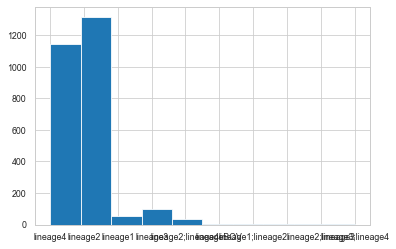

In [5]:
# What's the dristribution of the main lineages
tbprofiler_df["main_lin"].hist()

<AxesSubplot:>

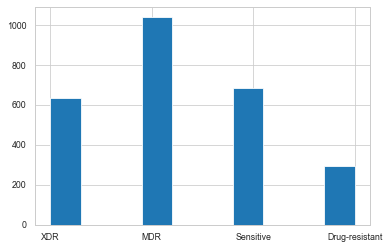

In [6]:
# Plot frequencies of drug resistance profiles
tbprofiler_df["drtype"].hist()

In [7]:
# Find the relationship between drtype and main_lin variables
tbprofiler_df.groupby(['drtype','main_lin']).size()

drtype          main_lin         
Drug-resistant  lineage1              14
                lineage2             131
                lineage2;lineage4      2
                lineage3              11
                lineage3;lineage4      1
                lineage4             135
                lineageBOV             1
MDR             lineage1               6
                lineage1;lineage2      1
                lineage2             589
                lineage2;lineage3      1
                lineage2;lineage4     18
                lineage3              51
                lineage4             372
Sensitive                              3
                lineage1              35
                lineage2             225
                lineage2;lineage4      2
                lineage3              10
                lineage4             411
XDR             lineage1               1
                lineage2             369
                lineage2;lineage4     12
                lineage

In [8]:
# Find the relationship between drtype and sublin variables

tbprofiler_df.groupby(['drtype','sublin']).size()


drtype          sublin                 
Drug-resistant  lineage1.1.1                8
                lineage1.1.1.1              2
                lineage1.1.2                2
                lineage1.2.2                2
                lineage2                    1
                                           ..
XDR             lineage4.7                  2
                lineage4.8                 37
                lineage4.8;lineage4.3.3     2
                lineage4.9                  2
                lineage4;lineage2.2.1       2
Length: 117, dtype: int64

In [9]:
pd.crosstab(index= tbprofiler_df.index, columns=tbprofiler_df["drtype"])

drtype,Drug-resistant,MDR,Sensitive,XDR
row_0,,,,
ERR027458,0,1,0,0
ERR027459,1,0,0,0
ERR027460,0,0,1,0
ERR027461,0,0,1,0
ERR027462,0,0,1,0
...,...,...,...,...
SRR9738553,0,1,0,0
SRR9738554,1,0,0,0
SRR9738556,0,0,0,1


In [10]:
pd.crosstab(index= tbprofiler_df['main_lin'], columns=tbprofiler_df["drtype"])

drtype,Drug-resistant,MDR,Sensitive,XDR
main_lin,,,,
,0,0,3,0
lineage1,14,6,35,1
lineage1;lineage2,0,1,0,0
lineage2,131,589,225,369
lineage2;lineage3,0,1,0,0
lineage2;lineage4,2,18,2,12
lineage3,11,51,10,25
lineage3;lineage4,1,0,0,0
lineage4,135,372,411,228


<AxesSubplot:xlabel='main_lin'>

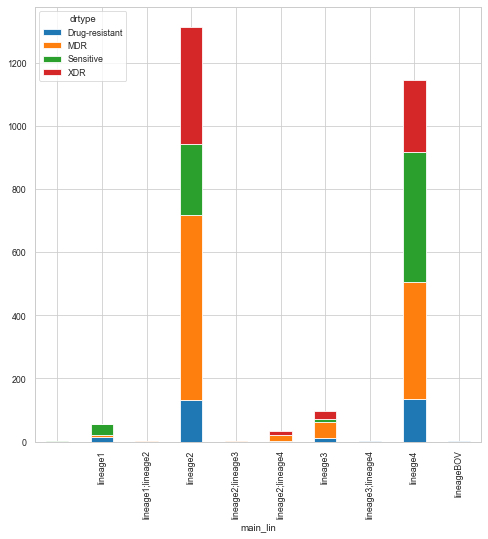

In [11]:
# Stacked Column Chart: visual form of the two-way table

pd.crosstab(index= tbprofiler_df['main_lin'], columns=tbprofiler_df["drtype"])\
                .plot(kind="bar", 
                     figsize=(8,8),
                     stacked=True)

In [12]:
## Find the relationship between sub lineages and drtype variables

pd.crosstab(index= tbprofiler_df['sublin'], columns= tbprofiler_df["drtype"])


drtype,Drug-resistant,MDR,Sensitive,XDR
sublin,,,,
,0,0,3,0
lineage1.1.1,8,2,17,0
lineage1.1.1.1,2,0,17,0
lineage1.1.2,2,3,0,0
lineage1.2.1,0,0,1,0
lineage1.2.2,2,1,0,1
lineage2,1,0,0,0
lineage2.1,2,0,7,0
lineage2.2.1,118,587,214,369


<AxesSubplot:xlabel='sublin'>

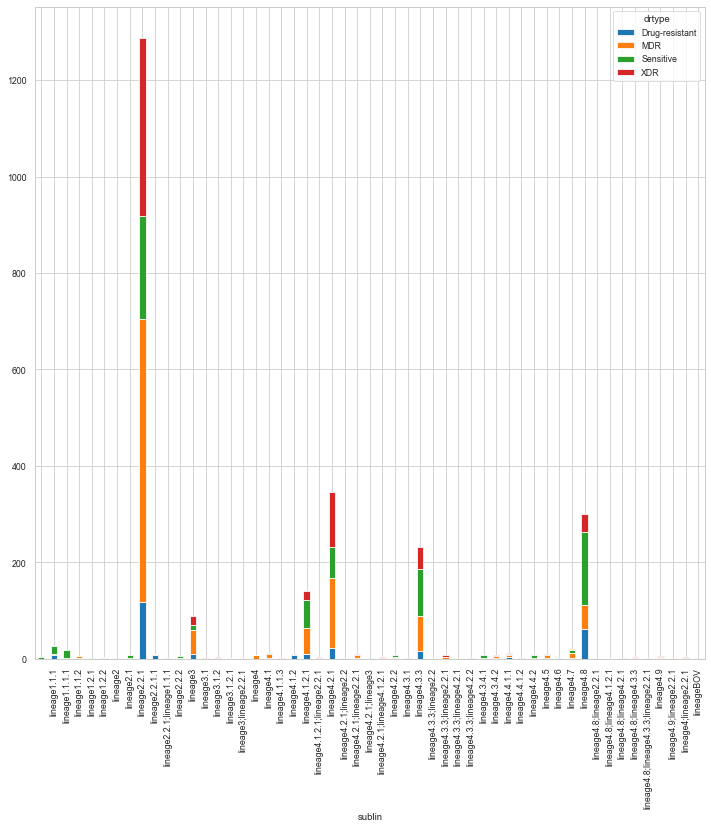

In [13]:
# Stacked Column Chart: visual form of the two-way table

pd.crosstab(index= tbprofiler_df['sublin'], columns= tbprofiler_df["drtype"])\
                .plot(kind="bar", 
                     figsize=(12,12),
                     stacked=True)

## Data from multi-sample cohort variant calling

In [20]:
# import scikit-allel
import allel
